https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html     
https://datacarpentry.org/image-processing/02-image-basics/

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.multiprocessing

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device '.format(device))

Using cpu device 


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# transforms.Normalize: output[channel] = (input[channel] - mean[channel]) / std[channel]
# This choice takes pixel values in [0,1] and shifts them to [-1,1]

batch_size = 4 # keep batch sizes powers of 2

# The cifar10 images loaded are <class 'PIL.Image.Image'>
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
print('type(trainset) =',type(trainset))
# Shuffle the training set and put it into batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2) 
# num_workers - https://pytorch.org/docs/stable/data.html

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') # these will be surf or green

print('type(classes =', type(classes))
print('classes[2] =', classes[2])

Files already downloaded and verified
type(trainset) = <class 'torchvision.datasets.cifar.CIFAR10'>
Files already downloaded and verified
type(classes = <class 'tuple'>
classes[2] = bird


In [4]:
# Get familiar with the trainset 
print('len(trainset) =', len(trainset))
print('type(trainset) =', type(trainset))
print('\n')
print('trainset[0][0].shape =', trainset[0][0].shape)
#print('trainset[0][0]= \n', trainset[0][0])
print('\n')
print('trainset[0][1] = ', trainset[0][1])
print('type(trainset[0][1]) = ', type(trainset[0][1]))
print('\n')
#print('trainset[1][0] = \n', trainset[1][0])
print('trainset[1][0].shape =', trainset[1][0].shape)
print('\n')
print('trainset[1][1] = ', trainset[1][1])
print('type(trainset[1][1]) = ', type(trainset[1][1]))

len(trainset) = 50000
type(trainset) = <class 'torchvision.datasets.cifar.CIFAR10'>


trainset[0][0].shape = torch.Size([3, 32, 32])


trainset[0][1] =  6
type(trainset[0][1]) =  <class 'int'>


trainset[1][0].shape = torch.Size([3, 32, 32])


trainset[1][1] =  9
type(trainset[1][1]) =  <class 'int'>


In [5]:
### https://wiki.python.org/moin/Generators
#'DataLoader' object is not subscriptable
# Turn trainloader into a list - takes up too much memory
torch.multiprocessing.set_sharing_strategy('file_system')
#trainloader2 = enumerate(trainloader)
#print('type(trainloader2) =', type(trainloader2))
#print('len(trainloader2) =', len(trainloader2))
trainloader3 = list(trainloader) # turn trainloader into list
print('type(trainloader3) =', type(trainloader3))

type(trainloader3) = <class 'list'>


In [6]:
# Get familiar with trainloader
print('type(trainloader3) =', type(trainloader3))
#print('len(trainloader2) =', len(trainloader2))
print('len(trainloader3 =', len(trainloader3))
print()
print('trainloader3[0] is a list of two elements.')
print('len(trainloader3[0]) =', len(trainloader3[0]))
print('type(trainloader3[0]) =', type(trainloader3[0]))
print()
print('trainloader[0][0] is list of four images (tensors).')
print('type(trainloader3[0][0]) =', type(trainloader3[0][0]))
print('trainloader3[0][0].shape) =', trainloader3[0][0].shape)
print()
print('trainloader[0][1] is list of four labels.')
print('len(trainloader3[0][1]) =', len(trainloader3[0][1]))
print('type(trainloader3[0][1]) =', type(trainloader3[0][1]))
print('trainloader3[0][1].shape) =', trainloader3[0][1].shape)
print()
print('trainloader3[0][1][k].item() for k=0,...,batch_size')
for k in range(batch_size):
    print(trainloader3[0][1][k].item())

type(trainloader3) = <class 'list'>
len(trainloader3 = 12500

trainloader3[0] is a list of two elements.
len(trainloader3[0]) = 2
type(trainloader3[0]) = <class 'list'>

trainloader[0][0] is list of four images (tensors).
type(trainloader3[0][0]) = <class 'torch.Tensor'>
trainloader3[0][0].shape) = torch.Size([4, 3, 32, 32])

trainloader[0][1] is list of four labels.
len(trainloader3[0][1]) = 4
type(trainloader3[0][1]) = <class 'torch.Tensor'>
trainloader3[0][1].shape) = torch.Size([4])

trainloader3[0][1][k].item() for k=0,...,batch_size
3
3
7
7


3
cat


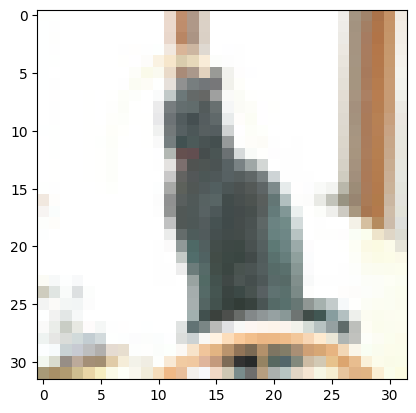

3
cat


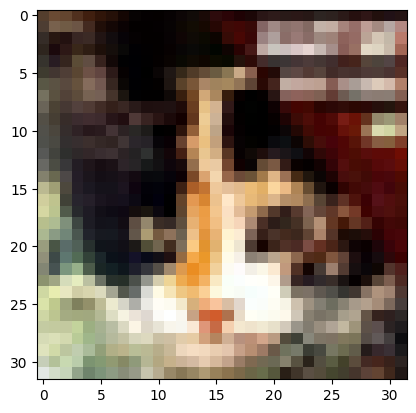

7
horse


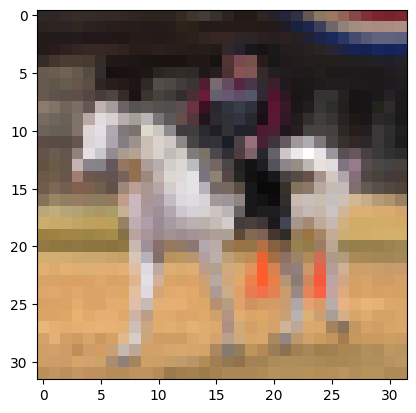

7
horse


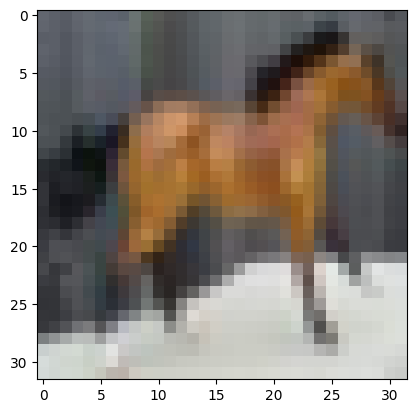

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to show/plot an image

def imshow(img):
    img = img / 2 + 0.5     # CIFAR images are in [-1,1]. Shift to [0,1]
    img_np = img.numpy()     # Convert from torch tensor to numpy array
    plt.imshow(np.transpose(img_np, (1, 2, 0)))  # Convert (C,H,W) to (H,W,C)
    plt.show()
for k in range(batch_size):
    print(trainloader3[0][1][k].item())
    print(classes[trainloader3[0][1][k].item()])
    imshow(trainloader3[0][0][k])


In [8]:
# Look at the trainloader
# print('type(trainloader[0]) =', type(trainloader[0])) - Won't work as a 
# 'DataLoader' object is not subscriptable.
print('type(trainloader) =', type(trainloader))
print('batch_size =', batch_size)
print('len(trainloader) =', len(trainloader))  # number of batches
print('batch_size*len(trainloader) =', batch_size*len(trainloader))
print()
print('type(trainloader.dataset) =', type(trainloader.dataset))
print('len(trainloader.dataset) =', len(trainloader.dataset))
print('type(trainloader.dataset[0]) =', type(trainloader.dataset[0]))
print('len(trainloader.dataset[0]) =', len(trainloader.dataset[0]))
img2,label2 = trainloader.dataset[0]
print('type(img2) =', type(img2))
print('type(label2)=', type(label2))

type(trainloader) = <class 'torch.utils.data.dataloader.DataLoader'>
batch_size = 4
len(trainloader) = 12500
batch_size*len(trainloader) = 50000

type(trainloader.dataset) = <class 'torchvision.datasets.cifar.CIFAR10'>
len(trainloader.dataset) = 50000
type(trainloader.dataset[0]) = <class 'tuple'>
len(trainloader.dataset[0]) = 2
type(img2) = <class 'torch.Tensor'>
type(label2)= <class 'int'>


type(images) =  <class 'torch.Tensor'>
len(images) =  4
len(labels) =  4
type(labels) =  <class 'torch.Tensor'>
4
deer


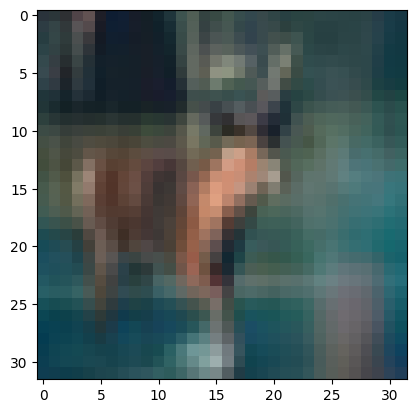

9
truck


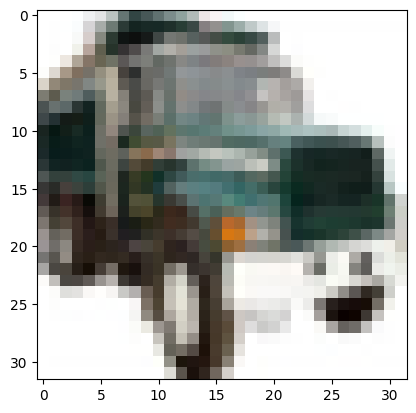

9
truck


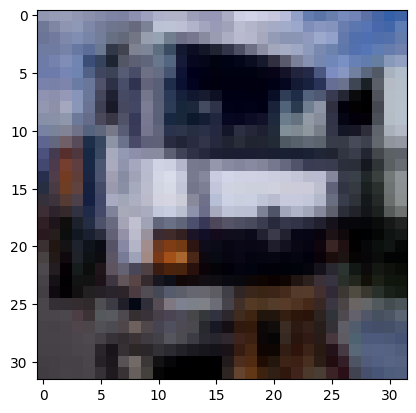

0
plane


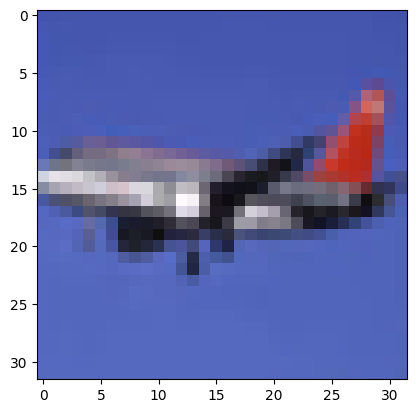

In [9]:
# Plot an image

import matplotlib.pyplot as plt
import numpy as np

# Define a function to show/plot an image
# Matlibplot command imshow wants numpy arrays scaled to [0,1].

def imshow(img):
    img = img / 2 + 0.5     # CIFAR images are in [-1,1]. Shift to [0,1]
    npimg = img.numpy()     # Convert from torch tensor to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert (C,H,W) to (H,W,C) height, width, color
    plt.show()

# Get example batch - Using trainloader NOT trainloader3 = list(trainloader)
dataiter = iter(trainloader)
images, labels = next(dataiter)
#images, labels = trainloader[0]
print('type(images) = ', type(images))
print('len(images) = ', len(images))
print('len(labels) = ', len(labels))
print('type(labels) = ', type(labels))
for k in range(batch_size):
    label = labels[k].item()
    print(label)
    print(classes[label])
    imshow(images[k])

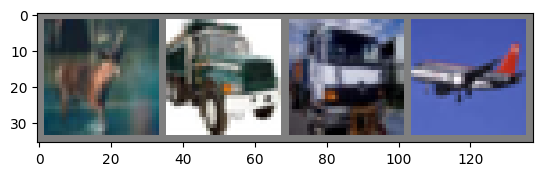

deer      truck     truck     plane     


In [10]:
imshow(torchvision.utils.make_grid(images))
# print labels
print(''.join(f'{classes[labels[j]]:10s}' for j in range(batch_size)))

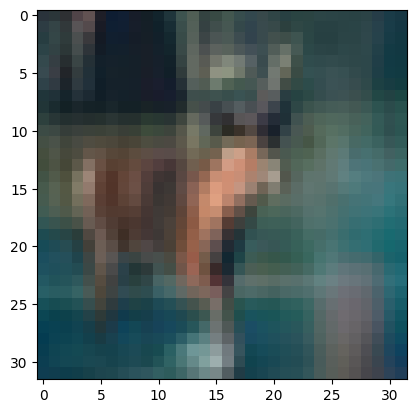

torch.Size([3, 32, 32])
<class 'torch.Tensor'>


In [11]:
imshow(images[0])
#imshow(torchvision.utils.make_grid(images[0]))
print(images[0].size())
print(type(images[0]))
#print(images[0])

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 48, stride = 1, kernel_size = 5)   # 6 maps of 28x28
        self.pool = nn.MaxPool2d(2, 2)                              # 6 maps of 14x14
        self.conv2 = nn.Conv2d(48, 96, stride = 1, kernel_size = 5)  # 16 maps of 10X10
        self.fc1 = nn.Linear(96 * 5 * 5, 120)                       # After (2,2) Pool2d on Conv2d 16*5*5                    
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr = 0.0005, momentum = 0.9)
optimizer = optim.Adam(net.parameters(), lr = 0.00001)

In [14]:
for epoch in range(10):  # loop over the range of dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):     # enumerate(iterable, start=0)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        # print(type(loss))
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.169
[1,  4000] loss: 1.947
[1,  6000] loss: 1.888
[1,  8000] loss: 1.829
[1, 10000] loss: 1.794
[1, 12000] loss: 1.750
[2,  2000] loss: 1.713
[2,  4000] loss: 1.671
[2,  6000] loss: 1.659
[2,  8000] loss: 1.632
[2, 10000] loss: 1.610
[2, 12000] loss: 1.597
[3,  2000] loss: 1.572
[3,  4000] loss: 1.556
[3,  6000] loss: 1.551
[3,  8000] loss: 1.526
[3, 10000] loss: 1.530
[3, 12000] loss: 1.506
[4,  2000] loss: 1.484
[4,  4000] loss: 1.478
[4,  6000] loss: 1.451
[4,  8000] loss: 1.471
[4, 10000] loss: 1.465
[4, 12000] loss: 1.447
[5,  2000] loss: 1.414
[5,  4000] loss: 1.425
[5,  6000] loss: 1.424
[5,  8000] loss: 1.394
[5, 10000] loss: 1.407
[5, 12000] loss: 1.418
[6,  2000] loss: 1.380
[6,  4000] loss: 1.364
[6,  6000] loss: 1.386
[6,  8000] loss: 1.353
[6, 10000] loss: 1.356
[6, 12000] loss: 1.357
[7,  2000] loss: 1.346
[7,  4000] loss: 1.314
[7,  6000] loss: 1.321
[7,  8000] loss: 1.319
[7, 10000] loss: 1.314
[7, 12000] loss: 1.291
[8,  2000] loss: 1.293
[8,  4000] 

In [16]:
PATH = './cifar_net11.pth' # saves the results of training to be applied to testing below
torch.save(net.state_dict(), PATH)

In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 57 %


In [16]:

import json
filename = 'CIFAR10_plot_data7.json'
f = open(filename, "w")
json.dump(correct, f)
f.close() 

testing_correct_xmin = 0
testing_cost_xmin = 0
testing_set_size = len(testloader) # could also try trainloader or data, or images

filename = 'CIFAR10_plot_parameters7.json'
f = open(filename, "w")
json.dump([10, testing_correct_xmin, testing_set_size], f) # 10= num_epochs
f.close()